In [162]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Simple Linear Regression

Objective : Our goal is to estimate the tip amount from the total Bill and build a Linear regression model

In [163]:
df = pd.read_csv('/kaggle/input/tipscsv/tips.csv')

In [164]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [165]:
df.shape

(244, 11)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [167]:
df.isnull().sum()

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
Payer Name          0
CC Number           0
Payment ID          0
dtype: int64

In [168]:
df.describe()

,total_bill,tip,size,price_per_person,CC Number
count,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,19.785943,2.998279,2.569672,7.888197,2.563496e+15
std,8.902412,1.383638,0.951100,2.914234,2.369340e+15
min,3.070000,1.000000,1.000000,2.880000,6.040679e+10
25%,13.347500,2.000000,2.000000,5.800000,3.040731e+13
50%,17.795000,2.900000,2.000000,7.255000,3.525318e+15
75%,24.127500,3.562500,3.000000,9.390000,4.553675e+15
max,50.810000,10.000000,6.000000,20.270000,6.596454e+15


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')

In [171]:
x = df.drop(columns=['tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'], axis = 1 )
y = df['tip']

In [172]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [173]:
import statsmodels.api as sm

In [174]:
x_train_const = sm.add_constant(x_train)
x_test_const = sm.add_constant(x_test)

In [175]:
model =sm.OLS(y_train,x_train_const).fit()

In [176]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     146.2
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           2.04e-25
Time:                        19:16:24   Log-Likelihood:                -290.84
No. Observations:                 195   AIC:                             585.7
Df Residuals:                     193   BIC:                             592.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9252      0.195      4.747      0.0

## Regression Equation
  
Tip(predicted) = 0.9252 + 0.1070*total_bill

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
lr = LinearRegression()

In [179]:
lr.fit(x_train,y_train)

LinearRegression()

In [180]:
lr.intercept_

0.925235558557056

In [181]:
lr.coef_

array([0.10696371])

In [182]:
y_pred = lr.predict(x_test)

In [183]:
y_test[0:3]

24     3.18
6      2.00
153    2.00
Name: tip, dtype: float64

In [184]:
y_pred[0:3]

array([3.04525623, 1.86330727, 3.55119456])

In [185]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [186]:
print('R2 score = ',r2_score(y_test,y_pred))

R2 score =  0.5449381659234664


In [187]:
mean_absolute_error(y_test,y_pred)

0.6208580000398983

In [188]:
mean_squared_error(y_test,y_pred)

0.5688142529229536

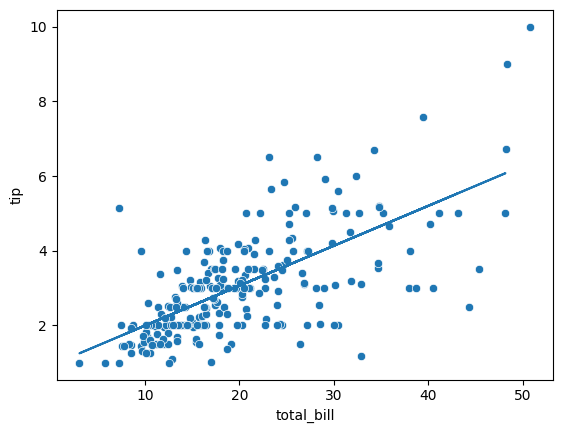

In [193]:
# This is Our Best Fit Line For this df
sns.scatterplot(data=df,x='total_bill',y='tip')
plt.plot(x_test,y_pred)
plt.show()